# Capstone Assignment

In [291]:
#import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


## Data Understanding and Preprocessing

In [292]:
df_loan = pd.read_csv('data/loan_prediction.csv')
df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [293]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [294]:
df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [295]:
#check for null values
df_loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [296]:
# drom load Id column as it is of no use
df_loan = df_loan.drop('Loan_ID', axis='columns')

In [297]:
def print_unique_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [298]:
print_unique_values(df_loan)

Gender : ['Male' 'Female' nan]
Married : ['No' 'Yes' nan]
Dependents : ['0' '1' '2' '3+' nan]
Education : ['Graduate' 'Not Graduate']
Self_Employed : ['No' 'Yes' nan]
Property_Area : ['Urban' 'Rural' 'Semiurban']
Loan_Status : ['Y' 'N']


In [299]:
# Replace null values
df_loan.ffill(inplace=True)

In [300]:
print_unique_values(df_loan)

Gender : ['Male' 'Female']
Married : ['No' 'Yes']
Dependents : ['0' '1' '2' '3+']
Education : ['Graduate' 'Not Graduate']
Self_Employed : ['No' 'Yes']
Property_Area : ['Urban' 'Rural' 'Semiurban']
Loan_Status : ['Y' 'N']


In [301]:
# Convert categorical columns to numeric
yes_no_cols = ['Married', 'Self_Employed']
for col in yes_no_cols:
    df_loan[col].replace({'Yes':1, 'No':0}, inplace=True)

In [302]:
df_loan['Loan_Status'].replace({'Y':1, 'N':0}, inplace=True)

In [303]:
df_loan['Dependents'].replace('3+', '4', inplace=True)
df_loan['Dependents'] = pd.to_numeric(df_loan['Dependents'])

In [304]:
df_loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,0,0,Graduate,0,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,1,1,Graduate,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,1,0,Graduate,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,1,0,Not Graduate,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,0,0,Graduate,0,6000,0.0,141.0,360.0,1.0,Urban,1


In [305]:
#check for null values
df_loan['LoanAmount'].fillna(df_loan['LoanAmount'].mean(), inplace=True)

In [306]:
df_loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,0,0,Graduate,0,5849,0.0,147.381729,360.0,1.0,Urban,1
1,Male,1,1,Graduate,0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,1,0,Graduate,1,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,1,0,Not Graduate,0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,0,0,Graduate,0,6000,0.0,141.000000,360.0,1.0,Urban,1


In [307]:
df_loan = pd.get_dummies(data=df_loan, columns=['Gender', 'Education', 'Property_Area'], dtype=int)

In [308]:
df_loan.head()

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,0,5849,0.0,147.381729,360.0,1.0,1,0,1,1,0,0,0,1
1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,1,1,0,1,0,0
2,1,0,1,3000,0.0,66.000000,360.0,1.0,1,0,1,1,0,0,0,1
3,1,0,0,2583,2358.0,120.000000,360.0,1.0,1,0,1,0,1,0,0,1
4,0,0,0,6000,0.0,141.000000,360.0,1.0,1,0,1,1,0,0,0,1


##  Exploratory Data Analysis 

array([[<Axes: title={'center': 'Married'}>,
        <Axes: title={'center': 'Dependents'}>,
        <Axes: title={'center': 'Self_Employed'}>,
        <Axes: title={'center': 'ApplicantIncome'}>],
       [<Axes: title={'center': 'CoapplicantIncome'}>,
        <Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>,
        <Axes: title={'center': 'Credit_History'}>],
       [<Axes: title={'center': 'Loan_Status'}>,
        <Axes: title={'center': 'Gender_Female'}>,
        <Axes: title={'center': 'Gender_Male'}>,
        <Axes: title={'center': 'Education_Graduate'}>],
       [<Axes: title={'center': 'Education_Not Graduate'}>,
        <Axes: title={'center': 'Property_Area_Rural'}>,
        <Axes: title={'center': 'Property_Area_Semiurban'}>,
        <Axes: title={'center': 'Property_Area_Urban'}>]], dtype=object)

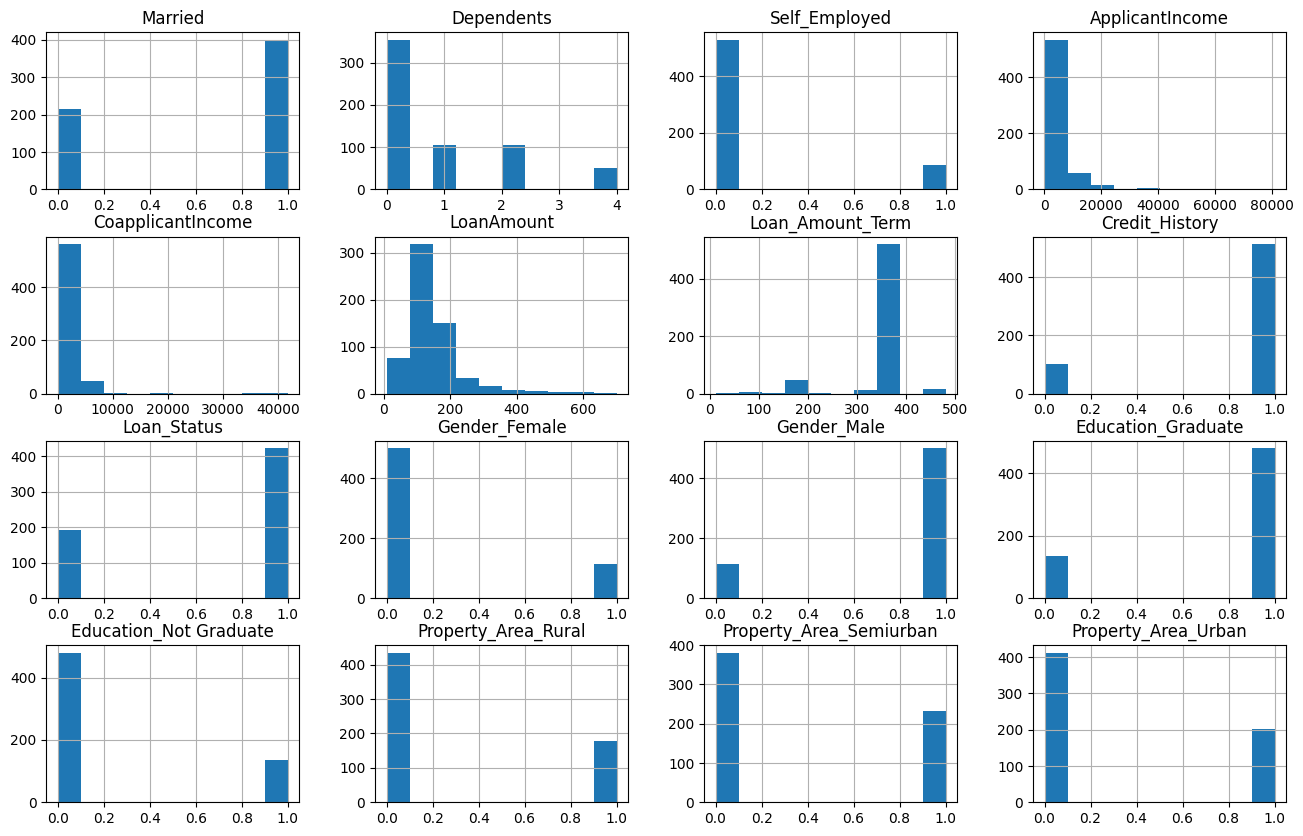

In [309]:
df_loan.hist(figsize=(16,10))

By looking at the above graph, data is highly skewed e.g. LoanAmount is dense on the left side or right side.

<Axes: >

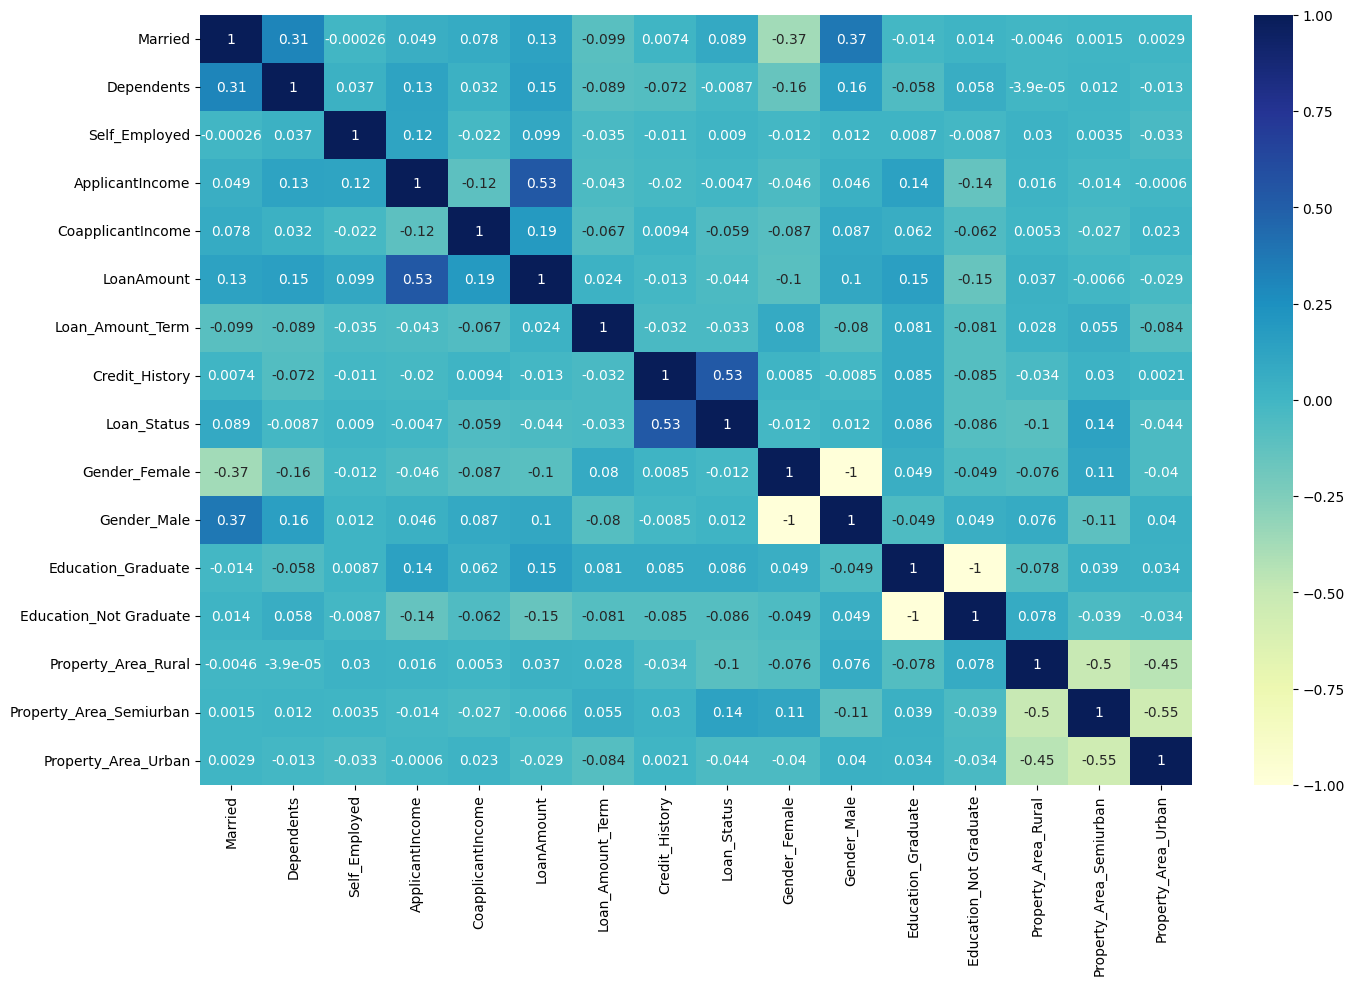

In [310]:
plt.figure(figsize=(16,10))
sn.heatmap(df_loan.corr(), annot=True, cmap='YlGnBu')

Credit History, Married, SelfEmployed, Gender Male, Graduate, Property Area Semi Urban have positive correlation with Loan Status while LoanAmount, LoanAmountTerm, Dependents, ApplicantIncome, CoApplicantIncome, Gender Female, Non Graduate, Property Area Urban and Property Area Rural have negative correlation.

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

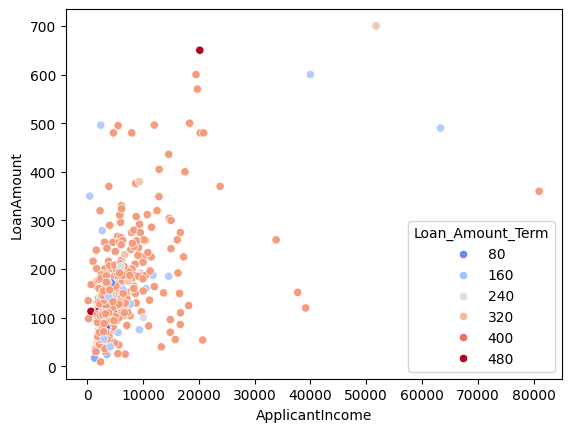

In [311]:
sn.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df_loan, hue='Loan_Amount_Term', palette='coolwarm')

Most loan were taken by people with Low Income Group i.e. below 10000

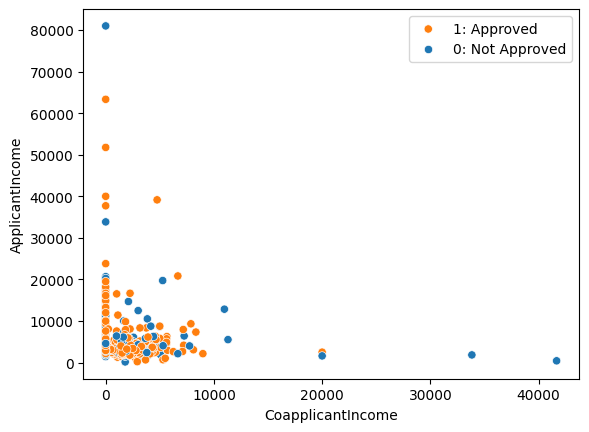

In [312]:

sn.scatterplot(x="CoapplicantIncome", y='ApplicantIncome', data=df_loan,hue='Loan_Status')
plt.legend(['1: Approved','0: Not Approved'])

Most Loan aproval cases are for people where applicant and co applicant income is within 10,000 (Low Income Group)

In [313]:
loan_status = df_loan.Loan_Status.value_counts().to_frame().rename(columns={'Approved':'Not Approved'})
loan_status["percent"] = loan_status.apply(lambda x: x/x.sum()*100).round(2)
display(loan_status)

,count,percent
Loan_Status,,
1,422,68.73
0,192,31.27


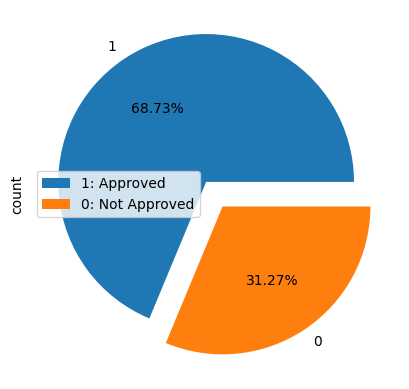

In [314]:
d=df_loan["Loan_Status"].value_counts()
d.plot(kind='pie', subplots=True, autopct='%1.2f%%', explode=(0.1, 0.1))
plt.legend(['1: Approved','0: Not Approved'])

Data is highly imbalanced with 68.73% are Approved cases and 31.27% are Non Approved cases.

In [315]:
#Data is imbalanced, We need to over sample Not Approved cases
from sklearn.utils import resample
df_loan_approved = df_loan[df_loan['Loan_Status'] == 1]
df_loan_not_approved = df_loan[df_loan['Loan_Status'] == 0]
df_loan_not_approved_new = resample(df_loan_not_approved, replace=True, n_samples=400)
df_loan_new = pd.concat([df_loan_approved, df_loan_not_approved_new])
df_loan_new.Loan_Status.value_counts()

Loan_Status
1    422
0    400
Name: count, dtype: int64

## Model Development

In [316]:
df_loan_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 822 entries, 0 to 464
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Married                  822 non-null    int64  
 1   Dependents               822 non-null    int64  
 2   Self_Employed            822 non-null    int64  
 3   ApplicantIncome          822 non-null    int64  
 4   CoapplicantIncome        822 non-null    float64
 5   LoanAmount               822 non-null    float64
 6   Loan_Amount_Term         822 non-null    float64
 7   Credit_History           822 non-null    float64
 8   Loan_Status              822 non-null    int64  
 9   Gender_Female            822 non-null    int64  
 10  Gender_Male              822 non-null    int64  
 11  Education_Graduate       822 non-null    int64  
 12  Education_Not Graduate   822 non-null    int64  
 13  Property_Area_Rural      822 non-null    int64  
 14  Property_Area_Semiurban  822 no

In [317]:
#scaling
cols_to_scale = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Dependents']
for col in cols_to_scale:
    df_loan_new[col] = (df_loan_new[col] - df_loan_new[col].min())/(df_loan_new[col].max() - df_loan_new[col].min())

df_loan_new.head()

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0.0,0,0.070489,0.000000,0.200263,0.74359,1.0,1,0,1,1,0,0,0,1
2,1,0.0,1,0.035250,0.000000,0.082489,0.74359,1.0,1,0,1,1,0,0,0,1
3,1,0.0,0,0.030093,0.056592,0.160637,0.74359,1.0,1,0,1,0,1,0,0,1
4,0,0.0,0,0.072356,0.000000,0.191027,0.74359,1.0,1,0,1,1,0,0,0,1
5,1,0.5,1,0.065145,0.100703,0.373372,0.74359,1.0,1,0,1,1,0,0,0,1


In [318]:
from sklearn.model_selection import train_test_split
X = df_loan_new.drop(['Loan_Status'], axis='columns')
y = df_loan_new['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=0)

In [319]:
#Classifiers
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC

### Logistic Regression

In [320]:
logit_clf=LogisticRegression()
logit_clf.fit(X_train, y_train)
logit_clf.score(X_test, y_test)

0.6303030303030303

###  KNN Classifier

In [321]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

0.696969696969697

### Support Vector Machines

In [322]:
svm_clf = SVC(probability=True)
svm_clf.fit(X_train, y_train)
svm_clf.score(X_test, y_test)

0.6181818181818182

### Decision Tree Classifier

In [323]:
dtree_clf = DecisionTreeClassifier()
dtree_clf.fit(X_train, y_train)
dtree_clf.score(X_test, y_test)

0.8121212121212121

<Axes: xlabel='importance', ylabel='feature'>

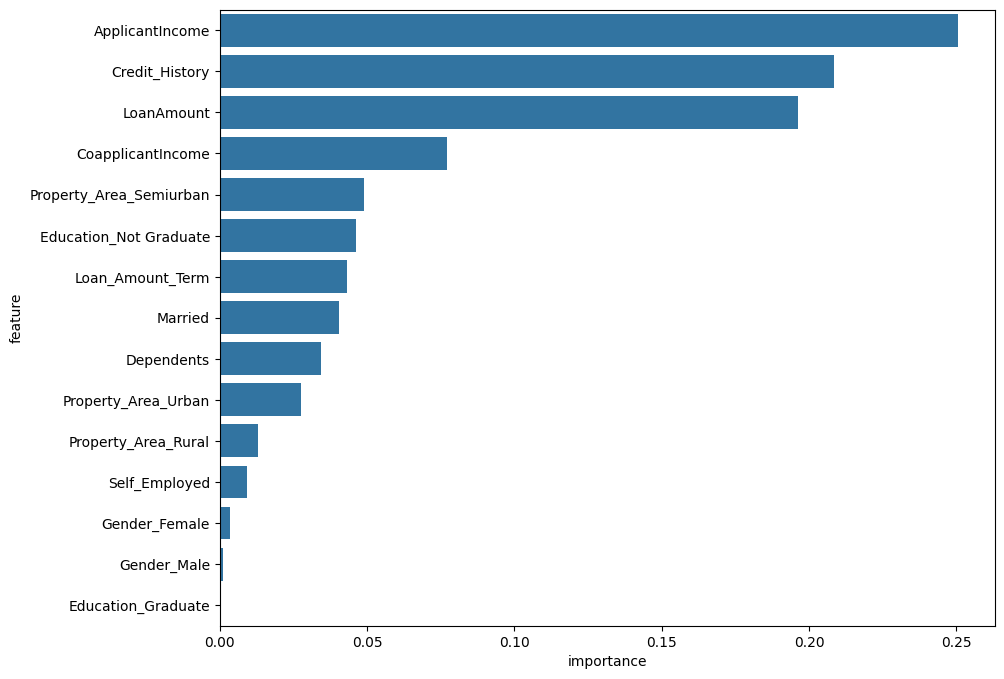

In [324]:
feature_rank = pd.DataFrame({'feature': X_train.columns, 'importance': dtree_clf.feature_importances_ })
feature_rank = feature_rank.sort_values('importance', ascending=False)

plt.figure(figsize=(10,8))
sn.barplot(y='feature', x='importance', data=feature_rank)

###  Bagging Classifier

In [325]:
bagging_clf = BaggingClassifier()
bagging_clf.fit(X_train, y_train)
bagging_clf.score(X_test, y_test)

0.8484848484848485

### Gradient Boosting Classifier

In [326]:
gboost_clf = GradientBoostingClassifier()
gboost_clf.fit(X_train, y_train)
gboost_clf.score(X_test, y_test)

0.7515151515151515

<Axes: xlabel='importance', ylabel='feature'>

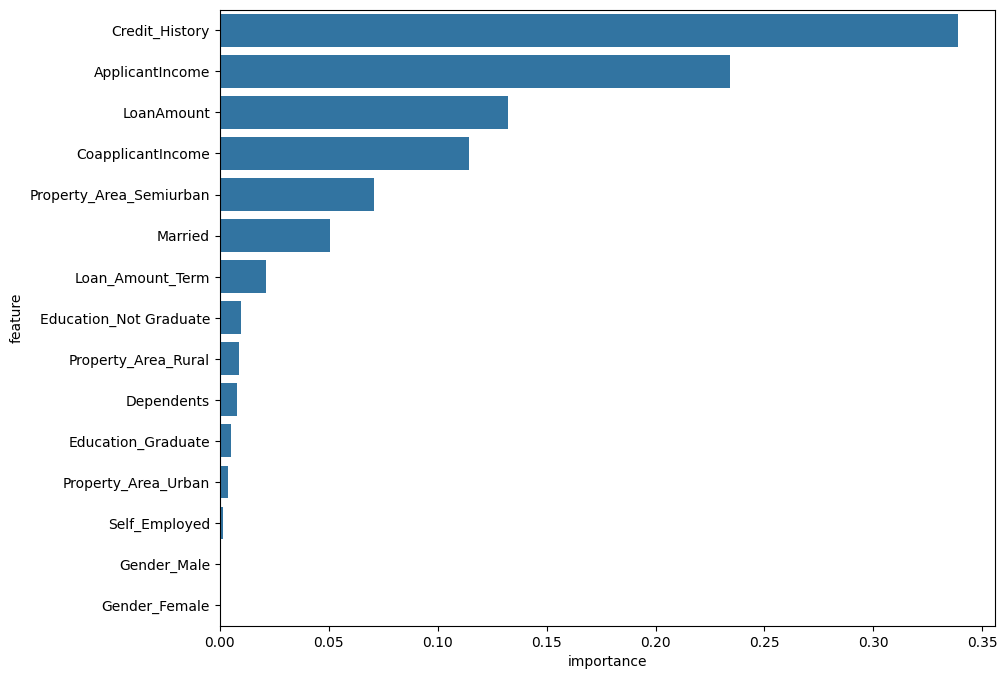

In [327]:
feature_rank = pd.DataFrame({'feature': X_train.columns, 'importance': gboost_clf.feature_importances_ })
feature_rank = feature_rank.sort_values('importance', ascending=False)

plt.figure(figsize=(10,8))
sn.barplot(y='feature', x='importance', data=feature_rank)

### AdaBoost Classifier

In [328]:
adaboost_clf = AdaBoostClassifier()
adaboost_clf.fit(X_train, y_train)
adaboost_clf.score(X_test, y_test)

0.703030303030303

<Axes: xlabel='importance', ylabel='feature'>

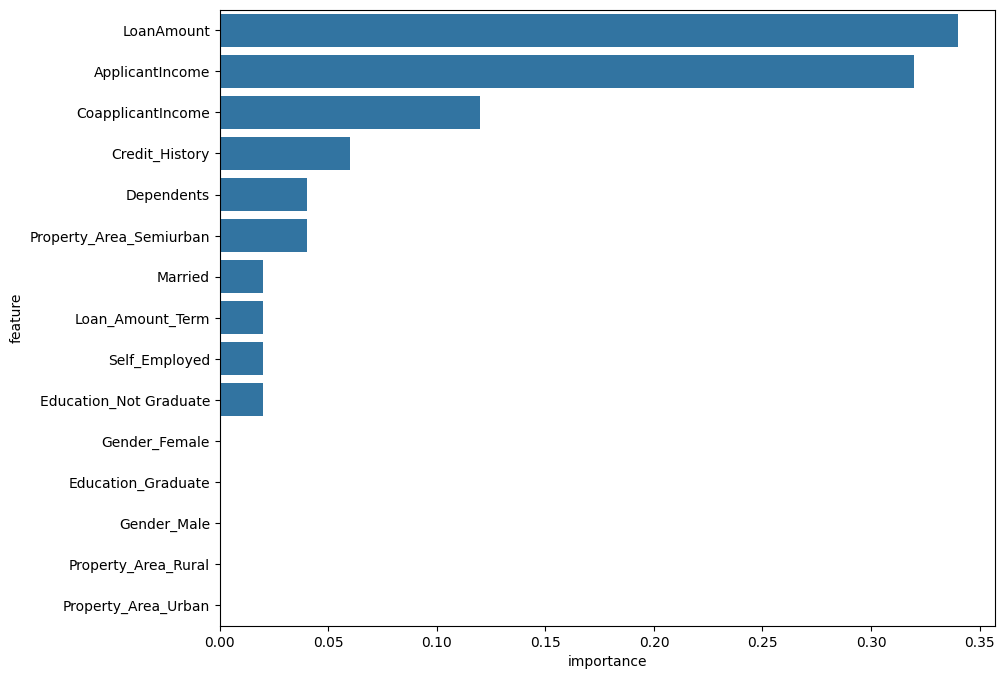

In [329]:
feature_rank = pd.DataFrame({'feature': X_train.columns, 'importance': adaboost_clf.feature_importances_ })
feature_rank = feature_rank.sort_values('importance', ascending=False)

plt.figure(figsize=(10,8))
sn.barplot(y='feature', x='importance', data=feature_rank)

Top 5 features contributed most to prediction are Credit Rating, Loan Amount, Applicant Income, Co Applicant Income, Loan Term

## Model Selection and Hyperparameter Tuning

In [330]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [331]:
def print_accuracy_score(model, X_test, y_test, message):
    y_pred = model.predict(X_test)
    print(f"Test Accuracy for {message}: ", metrics.accuracy_score(y_test, y_pred))

### Logistic Regression

In [332]:
#Logistic Regression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
log_reg = LogisticRegression()
clf = GridSearchCV(log_reg, grid, cv=5)
clf.fit(X_train, y_train)
print("Logistic Regression")
print("tuned hpyerparameters :(best parameters) ",clf.best_params_)
print("accuracy :",clf.best_score_)
print_accuracy_score(clf.best_estimator_, X_test, y_test, "Logistic Regression with tuned parameters")
print_accuracy_score(logit_clf, X_test, y_test, "Logistic Regression without tuned parameters")

Logistic Regression
tuned hpyerparameters :(best parameters)  {'C': np.float64(1.0), 'penalty': 'l2'}
accuracy : 0.7488780939162618
Test Accuracy for Logistic Regression with tuned parameters:  0.6303030303030303
Test Accuracy for Logistic Regression without tuned parameters:  0.6303030303030303


In [333]:
log_reg = LogisticRegression(C=np.float64(100), penalty='l2')
score = cross_val_score(log_reg, X, y, cv=5)
print(f"Cross validation mean is {np.mean(score):.2f} and standard deviation is {np.std(score):.2f}")

Cross validation mean is 0.69 and standard deviation is 0.02


###  KNN Classifier

In [334]:
#KNN Classifier
k_range = list(range(1, 31))
grid=dict(n_neighbors=k_range)
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, grid, cv=5)
clf.fit(X_train, y_train)
print("KNN Classifier")
print("tuned hpyerparameters :(best parameters) ",clf.best_params_)
print("accuracy :",clf.best_score_)
print_accuracy_score(clf.best_estimator_, X_test, y_test, "KNN Classifier with tuned parameters")
print_accuracy_score(knn_clf, X_test, y_test, "KNN Classifier without tuned parameters")

KNN Classifier
tuned hpyerparameters :(best parameters)  {'n_neighbors': 1}
accuracy : 0.8478140180430257
Test Accuracy for KNN Classifier with tuned parameters:  0.8303030303030303
Test Accuracy for KNN Classifier without tuned parameters:  0.696969696969697


In [335]:
knn = KNeighborsClassifier(n_neighbors=1)
score = cross_val_score(knn, X, y, cv=5)
print(f"Cross validation mean is {np.mean(score):.2f} and standard deviation is {np.std(score):.2f}")

Cross validation mean is 0.87 and standard deviation is 0.01


### Support Vector Machines

In [336]:
#SVM
grid={'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']} 
svm = SVC()
clf = GridSearchCV(svm, grid, cv=5)
clf.fit(X_train, y_train)
print("SVM")
print("tuned hpyerparameters :(best parameters) ",clf.best_params_)
print("accuracy :",clf.best_score_)
print_accuracy_score(clf.best_estimator_, X_test, y_test, "SVM with tuned parameters")
print_accuracy_score(svm_clf, X_test, y_test, "SVM without tuned parameters")

SVM
tuned hpyerparameters :(best parameters)  {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
accuracy : 0.7960097154753644
Test Accuracy for SVM with tuned parameters:  0.7515151515151515
Test Accuracy for SVM without tuned parameters:  0.6181818181818182


In [337]:
svm = SVC(C=1000, gamma=1, kernel='rbf')
score = cross_val_score(svm, X, y, cv=5)
print(f"Cross validation mean is {np.mean(score):.2f} and standard deviation is {np.std(score):.2f}")

Cross validation mean is 0.82 and standard deviation is 0.02


### Decision Tree Classifier

In [338]:
#Decision Tree Classifier
grid={'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
dtree = DecisionTreeClassifier()
clf = GridSearchCV(dtree, grid, cv=5)
clf.fit(X_train, y_train)
print("Decision Tree Classifier")
print("tuned hpyerparameters :(best parameters) ",clf.best_params_)
print("accuracy :",clf.best_score_)
print_accuracy_score(clf.best_estimator_, X_test, y_test, "Decision Tree Classifier with tuned parameters")
print_accuracy_score(dtree_clf, X_test, y_test, "Decision Tree Classifier without tuned parameters")

Decision Tree Classifier
tuned hpyerparameters :(best parameters)  {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt'}
accuracy : 0.7715822345593338
Test Accuracy for Decision Tree Classifier with tuned parameters:  0.6787878787878788
Test Accuracy for Decision Tree Classifier without tuned parameters:  0.8121212121212121


In [339]:
dtree = DecisionTreeClassifier(ccp_alpha= 0.001, criterion='gini', max_depth=8, max_features='sqrt')
score = cross_val_score(dtree, X, y, cv=5)
print(f"Cross validation mean is {np.mean(score):.2f} and standard deviation is {np.std(score):.2f}")

Cross validation mean is 0.74 and standard deviation is 0.05


### Bagging Classifier

In [340]:
#Bagging Classifier
n_estimators = [10,30,50,70,80,150,160, 170,175,180,185]
grid={'n_estimators': n_estimators}
bag = BaggingClassifier()
clf = GridSearchCV(bag, grid, cv=5)
clf.fit(X_train, y_train)
print("Bagging Classifier")
print("tuned hpyerparameters :(best parameters) ",clf.best_params_)
print("accuracy :",clf.best_score_)
print_accuracy_score(clf.best_estimator_, X_test, y_test, "Bagging Classifier with tuned parameters")
print_accuracy_score(bagging_clf, X_test, y_test, "Bagging Classifier without tuned parameters")

Bagging Classifier
tuned hpyerparameters :(best parameters)  {'n_estimators': 80}
accuracy : 0.87676382142031
Test Accuracy for Bagging Classifier with tuned parameters:  0.9030303030303031
Test Accuracy for Bagging Classifier without tuned parameters:  0.8484848484848485


In [341]:
bag = BaggingClassifier(n_estimators=160)
score = cross_val_score(bag, X, y, cv=5)
print(f"Cross validation mean is {np.mean(score):.2f} and standard deviation is {np.std(score):.2f}")

Cross validation mean is 0.89 and standard deviation is 0.01


### Gradient Boosting Classifier

In [342]:
#Gradient Boosting Classifier
n_estimators = [10,30,50,70,80,150,160, 170,175,180,185]
grid={'n_estimators': n_estimators, 'criterion':['friedman_mse', 'squared_error'], 'max_depth':[2,4,6,7,8]}
gboost = GradientBoostingClassifier()
clf = GridSearchCV(gboost, grid, cv=5)
clf.fit(X_train, y_train)
print("Gradient Boosting Classifier")
print("tuned hpyerparameters :(best parameters) ",clf.best_params_)
print("accuracy :",clf.best_score_)
print_accuracy_score(clf.best_estimator_, X_test, y_test, "Gradient Boosting Classifier with tuned parameters")
print_accuracy_score(gboost_clf, X_test, y_test, "Gradient Boosting Classifier without tuned parameters")

Gradient Boosting Classifier
tuned hpyerparameters :(best parameters)  {'criterion': 'squared_error', 'max_depth': 6, 'n_estimators': 160}
accuracy : 0.8736988202637057
Test Accuracy for Gradient Boosting Classifier with tuned parameters:  0.8727272727272727
Test Accuracy for Gradient Boosting Classifier without tuned parameters:  0.7515151515151515


In [343]:
gboost = GradientBoostingClassifier(criterion='squared_error', max_depth=8, n_estimators=50)
score = cross_val_score(gboost, X, y, cv=5)
print(f"Cross validation mean is {np.mean(score):.2f} and standard deviation is {np.std(score):.2f}")

Cross validation mean is 0.90 and standard deviation is 0.02


### AdaBoost Classifier

In [344]:
#Ada Boost Classifier
n_estimators = [10,30,50,70,80,150,160, 170,175,180,185]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid={'n_estimators': n_estimators, 'learning_rate': learning_rate}
adaboost = AdaBoostClassifier()
clf = GridSearchCV(adaboost, grid, cv=5)
clf.fit(X_train, y_train)
print("Ada Boost Classifier")
print("tuned hpyerparameters :(best parameters) ",clf.best_params_)
print("accuracy :",clf.best_score_)
print_accuracy_score(clf.best_estimator_, X_test, y_test, "Ada Boost Classifier with tuned parameters")
print_accuracy_score(adaboost_clf, X_test, y_test, "Ada Boost Classifier without tuned parameters")

Ada Boost Classifier
tuned hpyerparameters :(best parameters)  {'learning_rate': 1.0, 'n_estimators': 170}
accuracy : 0.7960675456858662
Test Accuracy for Ada Boost Classifier with tuned parameters:  0.7515151515151515
Test Accuracy for Ada Boost Classifier without tuned parameters:  0.703030303030303


In [345]:
adaboost = AdaBoostClassifier(learning_rate=1.0, n_estimators=70)
score = cross_val_score(adaboost, X, y, cv=5)
print(f"Cross validation mean is {np.mean(score):.2f} and standard deviation is {np.std(score):.2f}")

Cross validation mean is 0.76 and standard deviation is 0.02


After applying Hyper parameter tuning and running cross validation Bagging Classifier has the best accuracy and Gradient Boost Classifier was close second.

Hyperparameter Tuning has imporved the accuracy of KNN Classifier, SVM, Bagging Classifier, Gradient Boosting Classifier, Ada Boost Classifer but reduced the accuracy of Decision Tree Classifier and there is no change in the accuracy of Logistic Regression.

## Model Evaluation and Interpretation

In [346]:
#Model evaluation tools
from sklearn import metrics

def plot_confusion_matrix(model, title):
    y_pred = model.predict(X_test)
    cm = metrics.confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sn.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["Approved", "Not Approved"], yticklabels = ["Approved", "Not Approved"])
    plt.title(title)

def plot_roc_curve(model, title):
    y_prob=model.predict_proba(X_test)[:,1:2]
    fpr, tpr, threshholds = metrics.roc_curve(y_test, y_prob, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(y_test, y_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC Curve (area = %2f)' % auc_score)

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]') 
    plt.ylabel('True Positive Rate')
    plt.title(title) 
    plt.legend(loc="lower right")
    plt.show()

def print_classification_report(model, title):
    y_pred = model.predict(X_test)
    print(title)
    print(metrics.classification_report(y_test, y_pred))

def print_reports(model, title):
    plot_roc_curve(model, title)
    plot_confusion_matrix(model, title)
    print_classification_report(model, title)

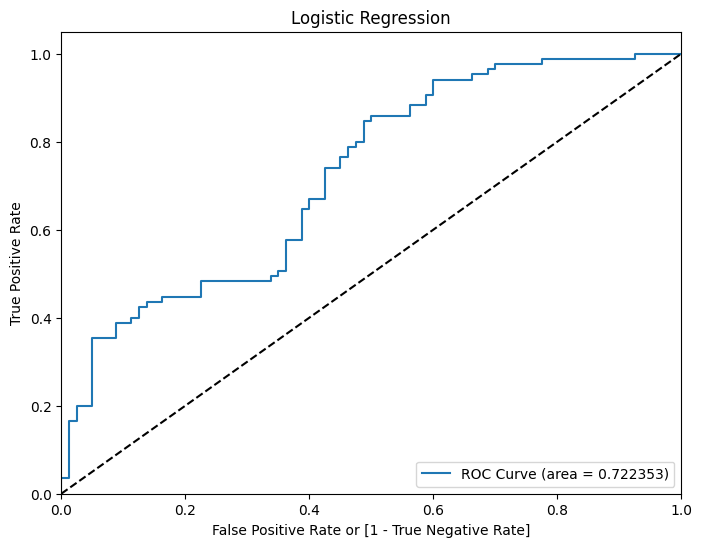

Logistic Regression
              precision    recall  f1-score   support

           0       0.62      0.57      0.60        80
           1       0.63      0.67      0.65        85

    accuracy                           0.62       165
   macro avg       0.62      0.62      0.62       165
weighted avg       0.62      0.62      0.62       165



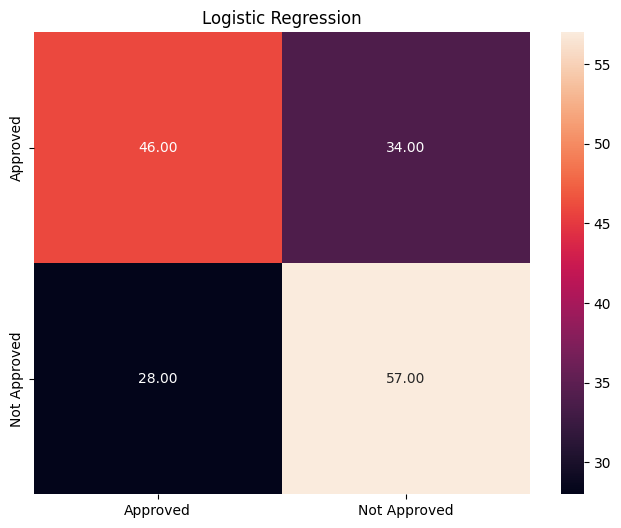

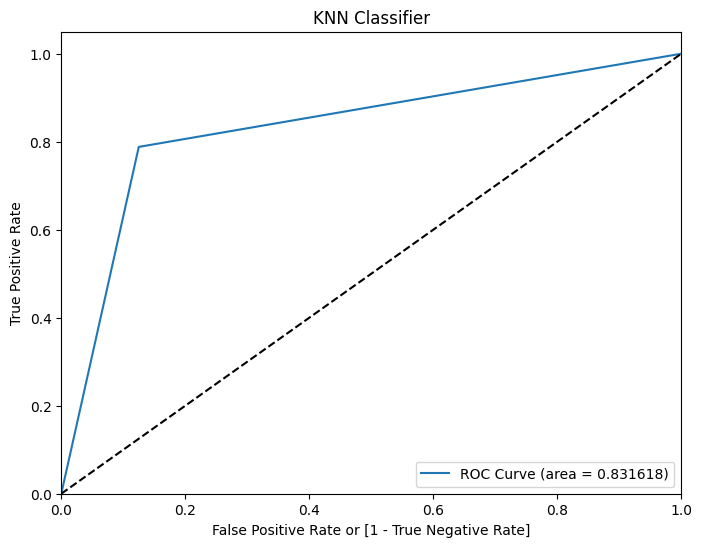

KNN Classifier
              precision    recall  f1-score   support

           0       0.80      0.88      0.83        80
           1       0.87      0.79      0.83        85

    accuracy                           0.83       165
   macro avg       0.83      0.83      0.83       165
weighted avg       0.83      0.83      0.83       165



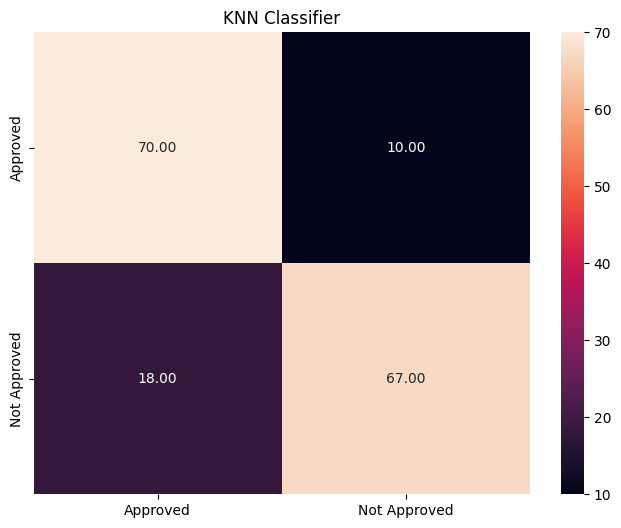

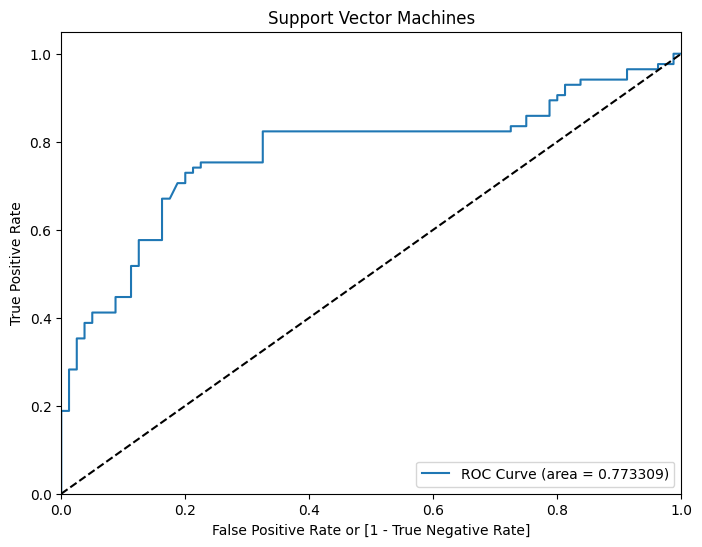

Support Vector Machines
              precision    recall  f1-score   support

           0       0.71      0.84      0.77        80
           1       0.81      0.67      0.74        85

    accuracy                           0.75       165
   macro avg       0.76      0.75      0.75       165
weighted avg       0.76      0.75      0.75       165



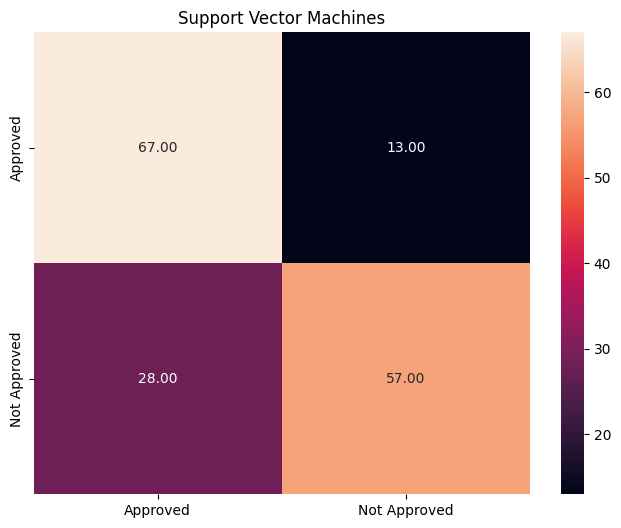

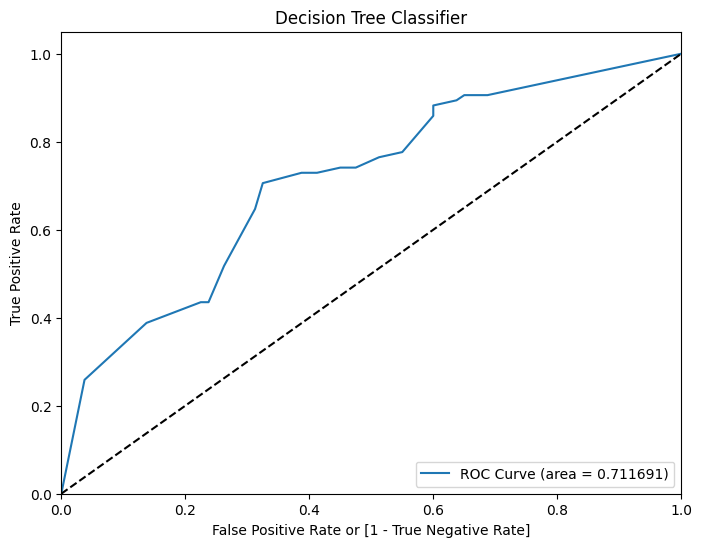

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.68      0.68      0.68        80
           1       0.70      0.71      0.70        85

    accuracy                           0.69       165
   macro avg       0.69      0.69      0.69       165
weighted avg       0.69      0.69      0.69       165



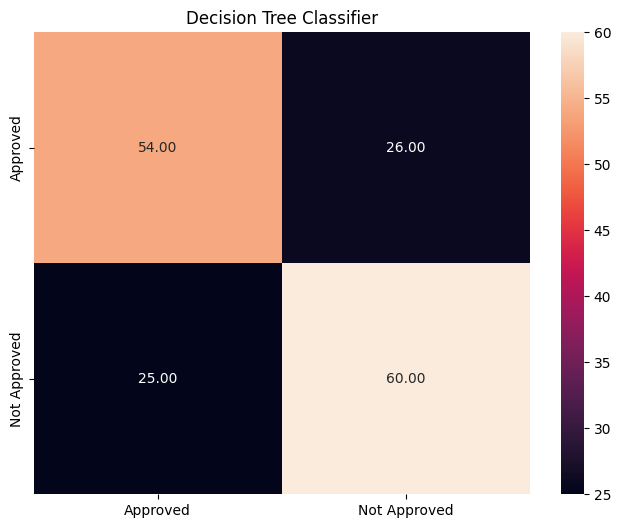

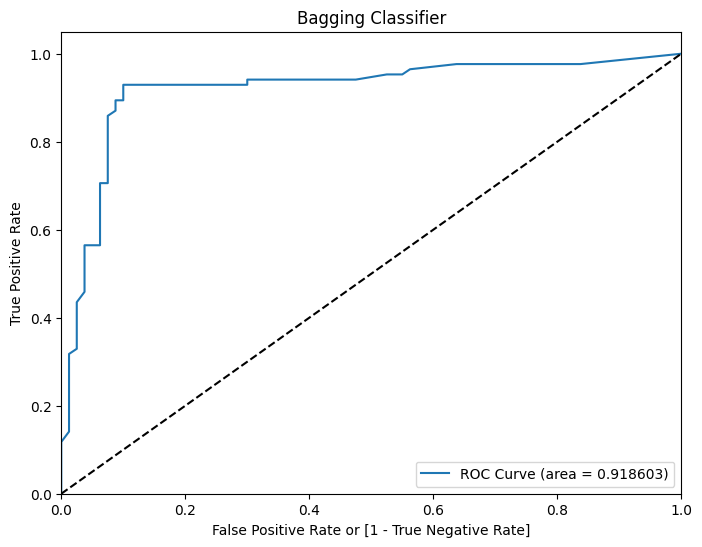

Bagging Classifier
              precision    recall  f1-score   support

           0       0.89      0.90      0.89        80
           1       0.90      0.89      0.90        85

    accuracy                           0.90       165
   macro avg       0.90      0.90      0.90       165
weighted avg       0.90      0.90      0.90       165



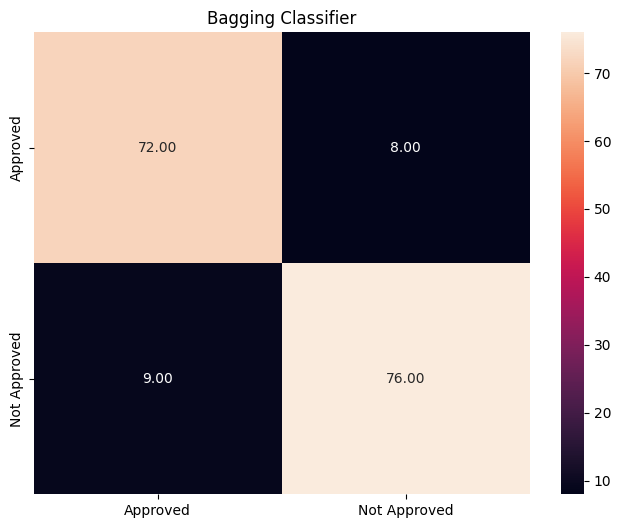

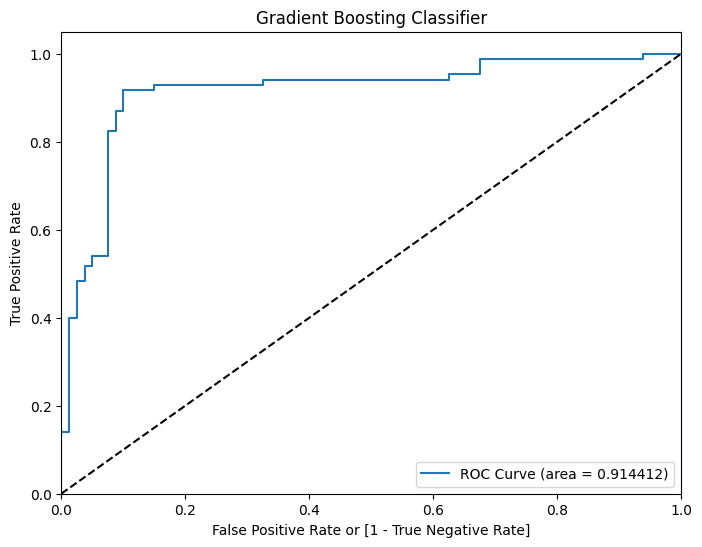

Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        80
           1       0.91      0.87      0.89        85

    accuracy                           0.89       165
   macro avg       0.89      0.89      0.89       165
weighted avg       0.89      0.89      0.89       165



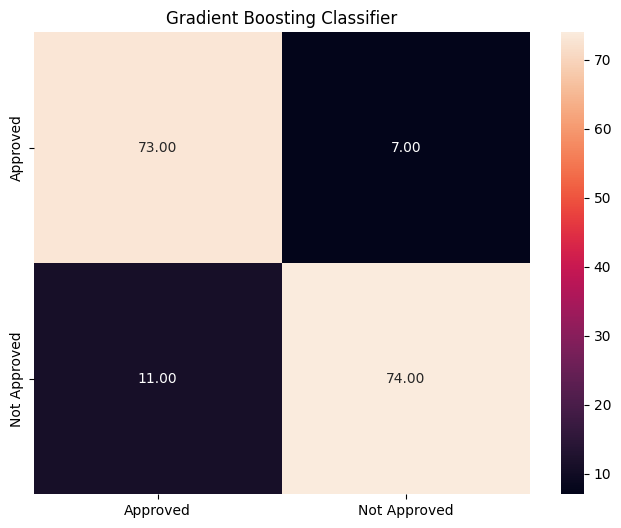

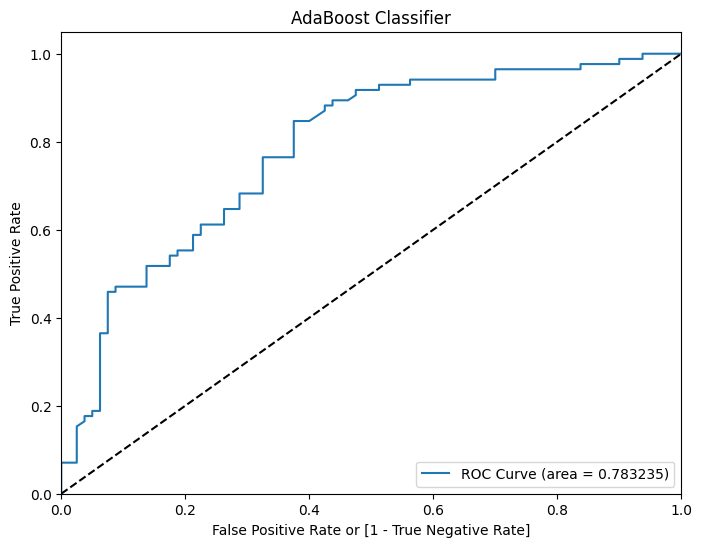

AdaBoost Classifier
              precision    recall  f1-score   support

           0       0.72      0.64      0.68        80
           1       0.69      0.76      0.73        85

    accuracy                           0.70       165
   macro avg       0.70      0.70      0.70       165
weighted avg       0.70      0.70      0.70       165



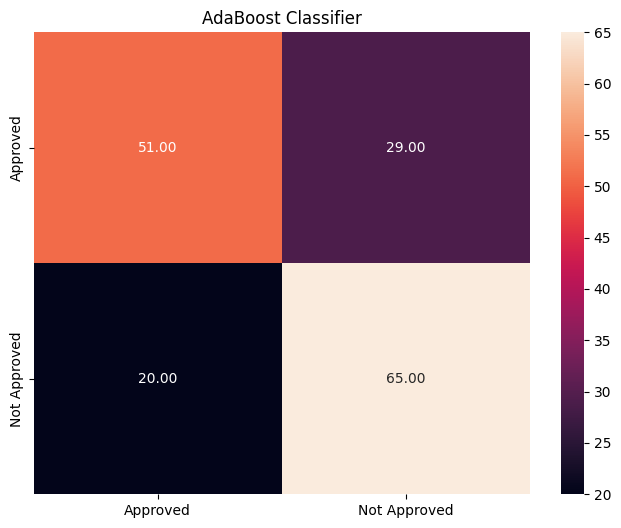

In [347]:
#display model stats

#Logistic Regression
logit_clf=LogisticRegression(C=np.float64(100), penalty='l2')
logit_clf.fit(X_train, y_train)
print_reports(logit_clf, 'Logistic Regression')

#KNN Classifier
knn_clf=KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(X_train, y_train)
print_reports(knn_clf, 'KNN Classifier')

#Support Vecctor Machine
svm_clf = SVC(C=1000, gamma=1, kernel='rbf', probability=True)
svm_clf.fit(X_train, y_train)
print_reports(svm_clf, 'Support Vector Machines')

#Decision Tree Classifier
dtree_clf = DecisionTreeClassifier(ccp_alpha= 0.001, criterion='gini', max_depth=8, max_features='sqrt')
dtree_clf.fit(X_train, y_train)
print_reports(dtree_clf, 'Decision Tree Classifier')

#Bagging Classifier
bagging_clf = BaggingClassifier(n_estimators=160)
bagging_clf.fit(X_train, y_train)
print_reports(bagging_clf, 'Bagging Classifier')

#Gradient Boosting lassifier
gboost_clf = GradientBoostingClassifier(criterion='squared_error', max_depth=8, n_estimators=50)
gboost_clf.fit(X_train, y_train)
print_reports(gboost_clf, 'Gradient Boosting Classifier')

#Ada Boost Classifier
adaboost = AdaBoostClassifier(learning_rate=1.0, n_estimators=70)
adaboost.fit(X_train, y_train)
print_reports(adaboost_clf, 'AdaBoost Classifier')

# Conclusion

1. After Hyper parameter tuning and running cross validation Bagging Classifier performed best and Gradient Boosting Classifier was close second.

2. False negative and False positive score are also the lowest for Bagging Classifier.

3. Precision and Recall values are the highest for Bagging Classifier and are very close for both Loan Approved status and Not Approved status. Therefore Bagging Classifier appears to best model for this problem.

4. Hyperparameter Tuning has imporved the accuracy of KNN Classifier, SVM, Bagging Classifier, Gradient Boosting Classifier, Ada Boost Classifer but reduced the accuracy of Decision Tree Classifier and there is no change in the accuracy of Logistic Regression.

5. Top 5 features contributed most to prediction are Credit Rating, Loan Amount, Applicant Income, Co Applicant Income, Loan Term

